<a href="https://colab.research.google.com/github/woraphonp-038-5/dataviz2025/blob/main/Final_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**กลุ่มที่ 4**

**สมาชิก** (กลุ่มที่ 4)

```
1.นายวรพล พลตรี 663020038-5
2.นางสาวศศิวิมล ภาณุโชติ 663020040-8
3.นายปณชัย แก้วไธสง 663020285-8
4.นางสาววรนุช  หาญเสมอ 663020294-7
5.นายกฤตนัย  วิเศษคร้อ 663020620-0
```


# **ข้อมูล Netflix-movies**

## 1.ดึงข้อมูล

In [ ]:
import pandas as pd

google_sheet_url = "https://docs.google.com/spreadsheets/d/1wHFl3tqu6uikv9nMb_Eu9jh-F-eu5aiw/edit?usp=sharing&ouid=106431408002842312954&rtpof=true&sd=true"

# Construct the URL for the first sheet (Netflix Films)
url_netflix_films = google_sheet_url.replace("/edit?usp=sharing&ouid=106431408002842312954&rtpof=true&sd=true", "/gviz/tq?tqx=out:csv&sheet=Netflix%20Films")
df1 = pd.read_csv(url_netflix_films)

# Construct the URL for the second sheet (Rotten Tomatoes Score)
url_rotten_tomatoes = google_sheet_url.replace("/edit?usp=sharing&ouid=106431408002842312954&rtpof=true&sd=true", "/gviz/tq?tqx=out:csv&sheet=Rotten%20Tomatoes%20Score")
df2 = pd.read_csv(url_rotten_tomatoes)

print("Data from 'Netflix Films' sheet (df1):")
display(df1.head())

print("\nData from 'Rotten Tomatoes Score' sheet (df2):")
display(df2.head())

Data from 'Netflix Films' sheet (df1):


,Movie Title,Director,Country,Release Year,Rating,Length,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,91 min,Children & Family Movies
2,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
3,The Starling,Theodore Melfi,United States,2021,PG-13,104 min,"Comedies, Dramas"
4,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"



Data from 'Rotten Tomatoes Score' sheet (df2):


,Movie Title,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews
0,Percy Jackson & the Olympians: The Lightning T...,49.0,149.0,53.0,254421.0
1,Please Give,87.0,142.0,64.0,11574.0
2,10,67.0,24.0,53.0,14684.0
3,12 Angry Men (Twelve Angry Men),100.0,54.0,97.0,105386.0
4,"20,000 Leagues Under The Sea",89.0,27.0,74.0,68918.0


## 2.การเตรียมข้อมูล

### ตรวจสอบ Missing Values

In [ ]:
print("Missing values in df1:")
print(df1.isnull().sum())

print("\nMissing values in df2:")
print(df2.isnull().sum())

Missing values in df1:
Movie Title       0
Director        188
Country           0
Release Year      0
Rating            2
Length            3
Genre             0
dtype: int64

Missing values in df2:
Movie Title                   0
TOMATOMETER                  44
# of Tomatometer Reviews     44
AUDIENCE SCORE              296
# of Audience Reviews       297
dtype: int64


In [ ]:
df1.fillna('unknown', inplace=True)
df2.fillna('unknown', inplace=True)

print("Missing values in df1 after filling:")
print(df1.isnull().sum())

print("\nMissing values in df2 after filling:")
print(df2.isnull().sum())

Missing values in df1 after filling:
Movie Title     0
Director        0
Country         0
Release Year    0
Rating          0
Length          0
Genre           0
dtype: int64

Missing values in df2 after filling:
Movie Title                 0
TOMATOMETER                 0
# of Tomatometer Reviews    0
AUDIENCE SCORE              0
# of Audience Reviews       0
dtype: int64


/tmp/ipython-input-4253354074.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.fillna('unknown', inplace=True)


In [ ]:
print("Number of duplicate rows in df1:", df1.duplicated().sum())
print("Number of duplicate rows in df2:", df2.duplicated().sum())

Number of duplicate rows in df1: 2
Number of duplicate rows in df2: 0


In [ ]:
df1.drop_duplicates(inplace=True)

print("Number of duplicate rows in df1 after dropping:", df1.duplicated().sum())

Number of duplicate rows in df1 after dropping: 0


### แยกและขยายคอลัมน์ 'Country'
แถวที่มีข้อมูล Country มากกว่า 1 Country

In [ ]:
df1['Country'] = df1['Country'].str.split(', ')
df1 = df1.explode('Country')

print("df1 after splitting 'Country' column:")
display(df1.head())

df1 after splitting 'Country' column:


,Movie Title,Director,Country,Release Year,Rating,Length,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,91 min,Children & Family Movies
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
2,Sankofa,Haile Gerima,Ghana,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
2,Sankofa,Haile Gerima,Burkina Faso,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df1['Country'].unique()

array(['United States', 'Not listed', 'Ghana', 'Burkina Faso',
       'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic', 'India',
       'France', 'China', 'Canada', 'South Africa', 'Japan', 'Nigeria',
       'Spain', 'Australia', 'Mexico', 'Italy', 'Romania', 'Argentina',
       'Venezuela', 'Hong Kong', 'Nepal', 'New Zealand', 'Brazil',
       'Greece', 'Colombia', 'Belgium', 'Switzerland', 'Bulgaria', '',
       'Algeria', 'Poland', 'Israel', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Egypt', 'Denmark', 'Kuwait', 'Netherlands',
       'Singapore', 'Malaysia', 'South Korea', 'Vietnam', 'Hungary',
       'Lebanon', 'Syria', 'Philippines', 'United Arab Emirates',
       'Sweden', 'Qatar', 'Mauritius', 'Austria', 'Turkey', 'Russia',
       'Taiwan', 'Cameroon', 'Palestine', 'Ireland', 'United Kingdom,',
       'Kenya', 'Chile', 'Uruguay', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Norway', 'Iceland', 'Serbia', 'Malta',
       'Luxembourg', 'Namibia', '

### แยกและขยายคอลัมน์ 'Genre'
แถวที่มีข้อมูล Genre มากกว่า 1 Genre

In [ ]:
df1['Genre'] = df1['Genre'].str.split(', ')
df1 = df1.explode('Genre')

print("df1 after splitting 'Genre' column:")
display(df1.head())

df1 after splitting 'Genre' column:


,Movie Title,Director,Country,Release Year,Rating,Length,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,91 min,Children & Family Movies
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,Dramas
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,Independent Movies
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,International Movies


### จัดการคอลัมน์ 'Length' เอาหน่วย นาที ออก

ใน df1 โดยเอาหน่วย min ออก และเปลี่ยนชื่อคอลัมน์เป็น 'Length (min)'

In [ ]:
df1['Length'] = df1['Length'].str.replace(' min', '')
display(df1.head())


,Movie Title,Director,Country,Release Year,Rating,Length,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90,Documentaries
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,91,Children & Family Movies
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125,Dramas
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125,Independent Movies
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125,International Movies


In [ ]:
df1 = df1.rename(columns={'Length': 'Length (min)'})

print("df1 after renaming 'Length' column:")
display(df1.head())

df1 after renaming 'Length' column:


,Movie Title,Director,Country,Release Year,Rating,Length (min),Genre
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90,Documentaries
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,91,Children & Family Movies
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125,Dramas
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125,Independent Movies
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125,International Movies


### จัดการคอลัมน์ 'Length'

ใน df1 เปลี่ยนค่าที่ผิดปกติ ซึ่งได้แก่ '74 min', '84 min', '66 min' เป็น  'unknown'

In [ ]:
df1['Rating'].unique()

array(['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'unknown', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df1['Rating'] = df1['Rating'].replace(['74 min', '84 min', '66 min'], 'unknown')

print("Unique values in 'Rating' column after replacement:")
print(df1['Rating'].unique())

Unique values in 'Rating' column after replacement:
['PG-13' 'PG' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y' 'R' 'TV-G' 'TV-Y7' 'G'
 'NC-17' 'unknown' 'NR' 'TV-Y7-FV' 'UR']


## 3.รวมโค้ด และ บันทึกไปยัง Google Sheet

In [ ]:
# ---------------------------------------------------------------------------
# ขั้นตอนที่ 1: ติดตั้งไลบรารีที่จำเป็น (สำหรับ Google Colab)
# ---------------------------------------------------------------------------
!pip install pandas gspread gspread-dataframe google-auth

# ---------------------------------------------------------------------------
# ขั้นตอนที่ 2: นำเข้าไลบรารีทั้งหมด
# ---------------------------------------------------------------------------
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
from google.colab import auth
from google.auth import default

# ---------------------------------------------------------------------------
# ส่วนที่ 1: การเตรียมข้อมูล (โค้ดที่คุณให้มา)
# ---------------------------------------------------------------------------

# 1.1 โหลดข้อมูลจาก Google Sheet ต้นทาง
google_sheet_url = "https://docs.google.com/spreadsheets/d/1wHFl3tqu6uikv9nMb_Eu9jh-F-eu5aiw/edit?usp=sharing&ouid=106431408002842312954&rtpof=true&sd=true"

# สร้าง URL สำหรับชีต 'Netflix Films'
url_netflix_films = google_sheet_url.replace("/edit?usp=sharing&ouid=106431408002842312954&rtpof=true&sd=true", "/gviz/tq?tqx=out:csv&sheet=Netflix%20Films")
df1 = pd.read_csv(url_netflix_films)

# สร้าง URL สำหรับชีต 'Rotten Tomatoes Score'
url_rotten_tomatoes = google_sheet_url.replace("/edit?usp=sharing&ouid=106431408002842312954&rtpof=true&sd=true", "/gviz/tq?tqx=out:csv&sheet=Rotten%20Tomatoes%20Score")
df2 = pd.read_csv(url_rotten_tomatoes)

print("โหลดข้อมูล df1 และ df2 เรียบร้อยแล้ว")

# 1.2 เติมค่าว่าง (Missing Values)
df1.fillna('unknown', inplace=True)
df2.fillna('unknown', inplace=True)
print("เติมค่าว่าง 'unknown' เรียบร้อยแล้ว")

# 1.3 ลบแถวที่ซ้ำซ้อน (Duplicates)
# (ตามโค้ดของคุณ: ลบเฉพาะ df1)
df1.drop_duplicates(inplace=True)
print("ลบแถวซ้ำใน df1 เรียบร้อยแล้ว")

# 1.4 แยกและขยายคอลัมน์ 'Country'
df1['Country'] = df1['Country'].str.split(', ')
df1 = df1.explode('Country')
print("ขยายคอลัมน์ 'Country' ใน df1 เรียบร้อยแล้ว")

# 1.5 แยกและขยายคอลัมน์ 'Country'
df1['Genre'] = df1['Genre'].str.split(', ')
df1 = df1.explode('Genre')
print("ขยายคอลัมน์ 'Genre' ใน df1 เรียบร้อยแล้ว")


# 1.6 จัดการคอลัมน์ 'Length' ใน df1 โดยเอาหน่วย min ออก และเปลี่ยนชื่อคอลัมน์เป็น 'Length (min)'
df1['Length'] = df1['Length'].str.replace(' min', '')
df1 = df1.rename(columns={'Length': 'Length (min)'})

# 1.7 จัดการคอลัมน์ 'Length' ใน df1 โดยการเปลี่ยนค่าที่ผิดปกติ ซึ่งได้แก่ '74 min', '84 min', '66 min' เป็น  'unknown'
df1['Rating'] = df1['Rating'].replace(['74 min', '84 min', '66 min'], 'unknown')


print("\n----- การเตรียมข้อมูลเสร็จสิ้น -----")

# ---------------------------------------------------------------------------
# ส่วนที่ 2: บันทึกไปยัง Google Sheet ไฟล์ใหม่
# ---------------------------------------------------------------------------

try:
    # 2.1 การยืนยันตัวตน (Authentication)
    # (ขั้นตอนนี้จะเด้งหน้าต่าง Pop-up ขึ้นมาให้คุณกด Allow)
    auth.authenticate_user()
    creds, _ = default()
    gc = gspread.authorize(creds)
    print("ยืนยันตัวตนเรียบร้อยแล้ว")

    # 2.2 กำหนดชื่อไฟล์ใหม่ที่จะสร้าง
    new_sheet_name = "Combined Movie Data (Processed)"

    # 2.3 สร้าง Google Sheet ใหม่
    sh = gc.create(new_sheet_name)
    print(f"กำลังสร้างไฟล์ใหม่ชื่อ: '{new_sheet_name}'...")

    # 2.4 บันทึก df1 ลงในชีตแรก และตั้งชื่อชีตตามที่คุณต้องการ
    worksheet1 = sh.get_worksheet(0) # เลือกชีตแรก (ชีตเริ่มต้น)
    worksheet1.update_title("Netflix Films")
    set_with_dataframe(worksheet1, df1, include_index=False, include_column_header=True, resize=True)
    print("บันทึก df1 ลงในชีต 'Netflix Films' เรียบร้อยแล้ว")

    # 2.5 เพิ่มชีตใหม่ และบันทึก df2 ลงไป
    worksheet2 = sh.add_worksheet(title="Rotten Tomatoes Score", rows=df2.shape[0], cols=df2.shape[1])
    set_with_dataframe(worksheet2, df2, include_index=False, include_column_header=True, resize=True)
    print("บันทึก df2 ลงในชีต 'Rotten Tomatoes Score' เรียบร้อยแล้ว")

    print("\n----- !! เสร็จสมบูรณ์ !! -----")
    print(f"คุณสามารถเปิดไฟล์ได้ที่ URL: {sh.url}")

except Exception as e:
    print(f"\n----- เกิดข้อผิดพลาด -----")
    print(f"ไม่สามารถบันทึก Google Sheet ได้: {e}")

โหลดข้อมูล df1 และ df2 เรียบร้อยแล้ว
เติมค่าว่าง 'unknown' เรียบร้อยแล้ว
ลบแถวซ้ำใน df1 เรียบร้อยแล้ว
ขยายคอลัมน์ 'Country' ใน df1 เรียบร้อยแล้ว
ขยายคอลัมน์ 'Genre' ใน df1 เรียบร้อยแล้ว

----- การเตรียมข้อมูลเสร็จสิ้น -----


/tmp/ipython-input-2149298264.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.fillna('unknown', inplace=True)


ยืนยันตัวตนเรียบร้อยแล้ว
กำลังสร้างไฟล์ใหม่ชื่อ: 'Combined Movie Data (Processed)'...
บันทึก df1 ลงในชีต 'Netflix Films' เรียบร้อยแล้ว
บันทึก df2 ลงในชีต 'Rotten Tomatoes Score' เรียบร้อยแล้ว

----- !! เสร็จสมบูรณ์ !! -----
คุณสามารถเปิดไฟล์ได้ที่ URL: https://docs.google.com/spreadsheets/d/17Pt3bSkyksPxLJJSUB0W96iXa84JTGUjk-ytycOiTLI


## 4.กราฟแสดงผลข้อมูล

In [ ]:
df1

,Movie Title,Director,Country,Release Year,Rating,Length (min),Genre
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90,Documentaries
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,91,Children & Family Movies
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125,Dramas
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125,Independent Movies
2,Sankofa,Haile Gerima,United States,1993,TV-MA,125,International Movies
...,...,...,...,...,...,...,...
6129,Zoom,Peter Hewitt,United States,2006,PG,88,Children & Family Movies
6129,Zoom,Peter Hewitt,United States,2006,PG,88,Comedies
6130,Zubaan,Mozez Singh,India,2015,TV-14,111,Dramas
6130,Zubaan,Mozez Singh,India,2015,TV-14,111,International Movies


/tmp/ipython-input-631459936.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Reds_r') # Use 'Reds_r' for darker red for higher values


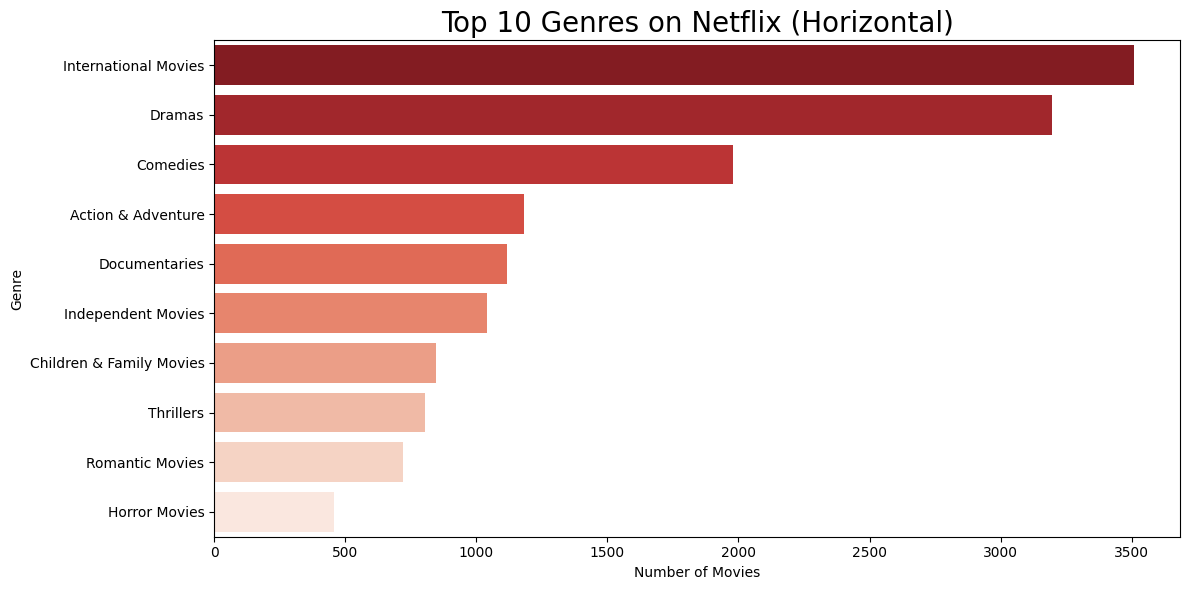

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each genre
top_genres = df1['Genre'].value_counts().head(10) # Get top 10 genres

# Create a horizontal bar plot with increased title size and red color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Reds_r') # Use 'Reds_r' for darker red for higher values
plt.title('Top 10 Genres on Netflix (Horizontal)', fontsize=20) # Increase title font size
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

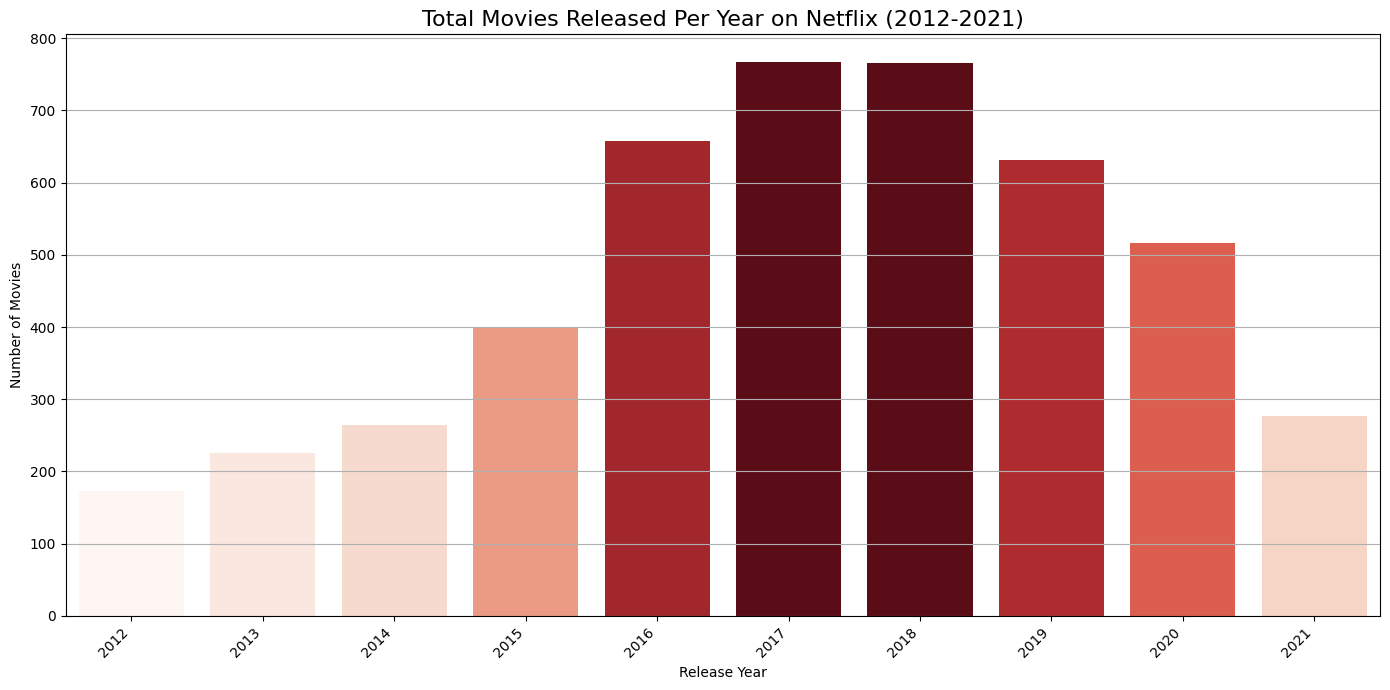

In [ ]:
# Drop duplicates based on 'Movie Title' to count unique movies per year
df1_unique_movies = df1.drop_duplicates(subset=['Movie Title', 'Release Year'])

# Count the number of movies per release year and filter for the last 10 years
movies_per_year = df1_unique_movies['Release Year'].value_counts().sort_index()
movies_last_10_years = movies_per_year[(movies_per_year.index >= 2012) & (movies_per_year.index <= 2021)]

# Create a bar plot for the last 10 years with increased title size and red color palette
plt.figure(figsize=(14, 7))
# sns.barplot(x=movies_last_10_years.index, y=movies_last_10_years.values, palette='Reds_r', hue=movies_last_10_years.index, legend=False) # Use 'Reds_r' for darker red for higher values and set hue for color mapping
sns.barplot(x=movies_last_10_years.index,
            y=movies_last_10_years.values,
            palette='Reds',  # ใช้ 'Reds' (ค่ามากสีเข้ม)
            hue=movies_last_10_years.values, # ใช้ 'values' เป็นตัวกำหนดสี
            legend=False) # ปิดแถบสีที่ไม่จำเป็น
plt.title('Total Movies Released Per Year on Netflix (2012-2021)', fontsize=16) # Increase title font size
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

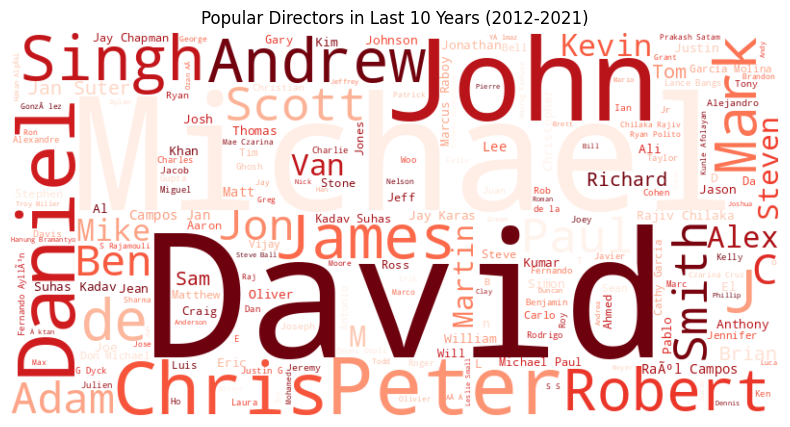

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data for the last 10 years (2012-2021)
df1_last_10_years = df1[(df1['Release Year'] >= 2012) & (df1['Release Year'] <= 2021)]

# Drop duplicates based on 'Movie Title' and 'Director' to count unique movie-director combinations
df1_unique_movie_director = df1_last_10_years.drop_duplicates(subset=['Movie Title', 'Director'])

# Exclude 'unknown' directors and create a single string of all director names
all_directors = ' '.join(df1_unique_movie_director[df1_unique_movie_director['Director'] != 'unknown']['Director'].dropna())

# Generate the word cloud with a red colormap
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(all_directors)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Directors in Last 10 Years (2012-2021)')
plt.show()

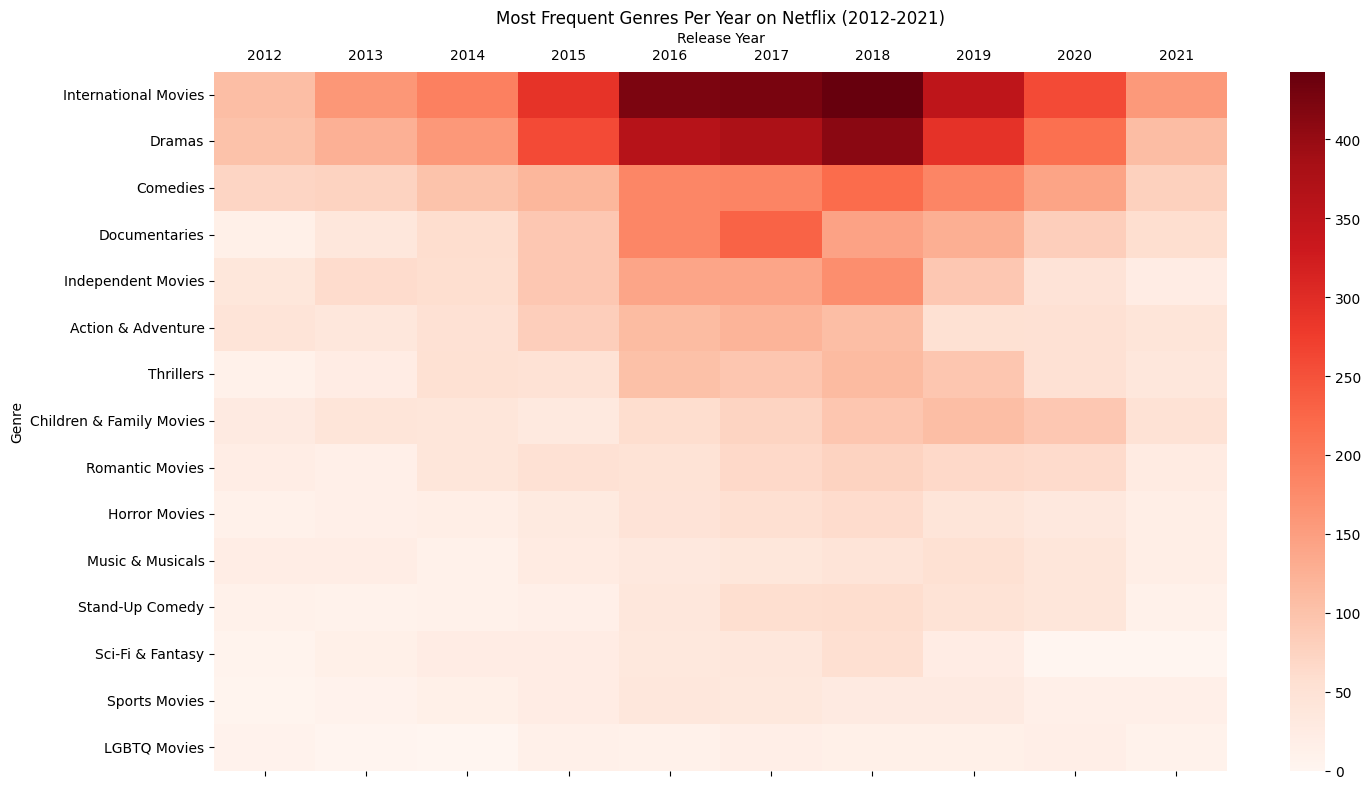

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the last 10 years (2012-2021)
df1_last_10_years = df1[(df1['Release Year'] >= 2012) & (df1['Release Year'] <= 2021)].copy()

# Drop duplicates based on 'Movie Title' to count unique movies per year for overall context
# Although for genre count per year, duplicates based on Movie Title and Genre are implicitly handled by value_counts/groupby
df1_unique_movies_last_10_years = df1_last_10_years.drop_duplicates(subset=['Movie Title'])


# Count the occurrences of each genre per year
genre_counts_per_year = df1_last_10_years.groupby(['Release Year', 'Genre']).size().unstack(fill_value=0)

# Select the top N genres overall for better visualization (optional)
top_genres_overall = df1_last_10_years['Genre'].value_counts().head(15).index # Get top 15 genres
genre_counts_per_year_top = genre_counts_per_year[top_genres_overall]


# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(genre_counts_per_year_top.T, cmap='Reds', annot=False, fmt='d') # Use Transpose (.T) to have Genres on Y-axis and Years on X-axis
plt.title('Most Frequent Genres Per Year on Netflix (2012-2021)')
plt.xlabel('Release Year')
plt.tick_params(axis='x', labelbottom=False, labeltop=True)
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Genre')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **ข้อมูล imdb_top_1000_cleaned**



##  ดึงข้อมูล

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataviz2025/final_data/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## จัดการข้อมูล

เช็ค null

In [ ]:
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


เช็ค duplicate

In [ ]:
duplicate_No_of_Votes = df[df.duplicated(subset=['No_of_Votes'], keep=False)]

if duplicate_No_of_Votes.empty:
    print("There are no duplicate.")
else:
    print(f"There are {len(duplicate_No_of_Votes)} rows with duplicate_No_of_Votes.")

There are 2 rows with duplicate_No_of_Votes.


In [ ]:
display(duplicate_No_of_Votes)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
100,https://m.media-amazon.com/images/M/MV5BZTYwZW...,Bacheha-Ye aseman,1997,PG,89 min,"Drama, Family, Sport",8.3,"After a boy loses his sister's pair of shoes, ...",77.0,Majid Majidi,Mohammad Amir Naji,Amir Farrokh Hashemian,Bahare Seddiqi,Nafise Jafar-Mohammadi,65341,"933,933"
719,https://m.media-amazon.com/images/M/MV5BMTQ0Nj...,Frankenstein,1931,Passed,70 min,"Drama, Horror, Sci-Fi",7.8,Dr. Frankenstein dares to tamper with life and...,91.0,James Whale,Colin Clive,Mae Clarke,Boris Karloff,John Boles,65341,NaN


### จัดการ missing

In [ ]:
df['Certificate'] = df['Certificate'].fillna('not provided')
df['Meta_score'] = df['Meta_score'].fillna('not provided')
df['Gross'] = df['Gross'].fillna('not provided')
display(df.head())

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### ลบ min ใน runtime

In [ ]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')
display(df.head())

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


### แยก genre

In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')


print("df_clean after splitting 'Genre' column:")
display(df.head())


df_clean after splitting 'Genre' column:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [ ]:
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


### เปลี่ยนชื่อ column

In [ ]:
df = df.rename(columns={'Runtime': 'Runtime(min)'})
display(df.head())

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime(min),Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [ ]:
unique_Meta_score = df['Meta_score'].unique()
print("Unique Meta_score DataFrame:")
print(unique_Meta_score)

Unique Meta_score DataFrame:
[80.0 100.0 84.0 90.0 96.0 94.0 74.0 66.0 92.0 82.0 87.0 73.0 83.0
 'not provided' 79.0 91.0 61.0 59.0 65.0 85.0 98.0 89.0 88.0 57.0 67.0
 62.0 77.0 64.0 75.0 97.0 99.0 78.0 68.0 81.0 95.0 76.0 69.0 55.0 70.0
 58.0 86.0 71.0 63.0 93.0 72.0 60.0 47.0 49.0 50.0 33.0 54.0 56.0 51.0
 53.0 48.0 44.0 45.0 40.0 52.0 28.0 36.0 46.0 30.0 41.0]


In [ ]:
unique_Gross = df['Gross'].unique()
print("Unique Gross DataFrame:")
print(unique_Gross)

Unique Gross DataFrame:
['28,341,469' '134,966,411' '534,858,444' '57,300,000' '4,360,000'
 '377,845,905' '107,928,762' '96,898,818' '292,576,195' '37,030,102'
 '315,544,750' '330,252,182' '6,100,000' '342,551,365' '171,479,930'
 '46,836,394' '290,475,067' '112,000,000' 'not provided' '53,367,844'
 '188,020,017' '7,563,397' '10,055,859' '216,540,909' '136,801,374'
 '57,598,247' '100,125,643' '130,742,922' '322,740,140' '269,061'
 '335,451,311' '13,092,000' '13,182,281' '53,089,891' '132,384,315'
 '32,572,577' '187,705,427' '6,719,864' '23,341,568' '19,501,238'
 '422,783,777' '204,843,350' '11,990,401' '210,609,762' '5,321,508'
 '32,000,000' '1,024,560' '163,245' '19,181' '1,661,096' '5,017,246'
 '12,391,761' '190,241,310' '858,373,000' '678,815,482' '209,726,015'
 '162,805,434' '448,139,099' '6,532,908' '1,223,869' '223,808,164'
 '11,286,112' '707,481' '25,544,867' '2,375,308' '248,159,971'
 '44,017,374' '83,471,511' '78,900,000' '275,902' '8,175,000' '36,764,313'
 '288,475' '159,227,6

In [ ]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime(min),Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,not provided,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,not provided
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,not provided,97,War,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,not provided
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,not provided,86,Crime,7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,not provided
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,not provided,86,Mystery,7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,not provided


## โหลดข้อมูลเป็น sheet

In [ ]:
import gspread
from google.colab import auth
from google.auth import default
from gspread_dataframe import set_with_dataframe

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

spreadsheet = gc.create("imdb_top_1000_Cleaned")

worksheet1 = spreadsheet.add_worksheet(title="imdb_top_1000", rows="100", cols="20")
set_with_dataframe(worksheet1, df)

default_sheet = spreadsheet.sheet1
spreadsheet.del_worksheet(default_sheet)

# Make the spreadsheet public
spreadsheet.share(None, perm_type='anyone', role='writer')

print(f"Google Sheets saved:")
print(f"URL: {spreadsheet.url}")

Google Sheets saved:
URL: https://docs.google.com/spreadsheets/d/1CY7AdTPHfR53WirV3qnuDUdghDmM_lBPY05hr4mGFhI


## กราฟ

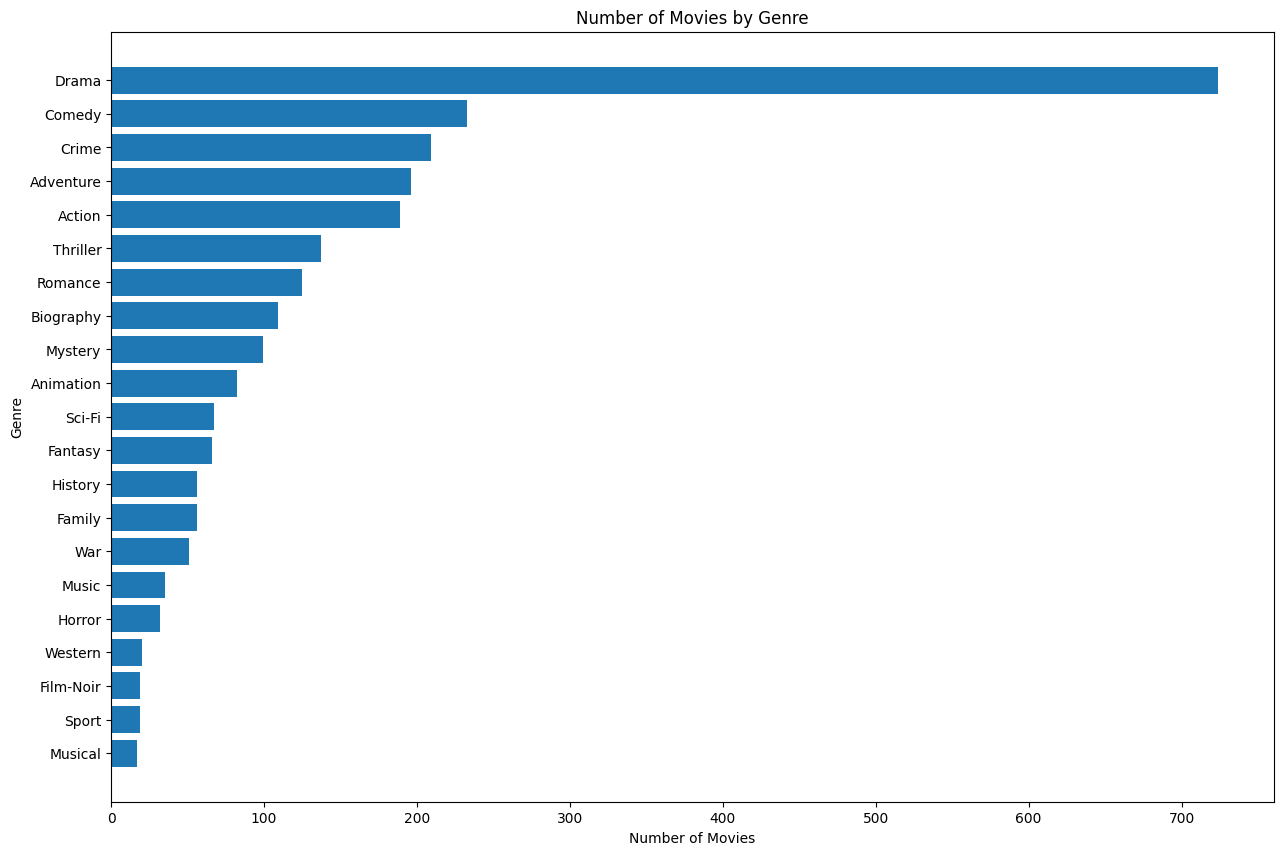

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each genre
genre_counts = df['Genre'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
plt.barh(genre_counts.index, genre_counts.values)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Number of Movies by Genre')
plt.gca().invert_yaxis()  # Invert y-axis to show the genre with most movies at the top
plt.show()

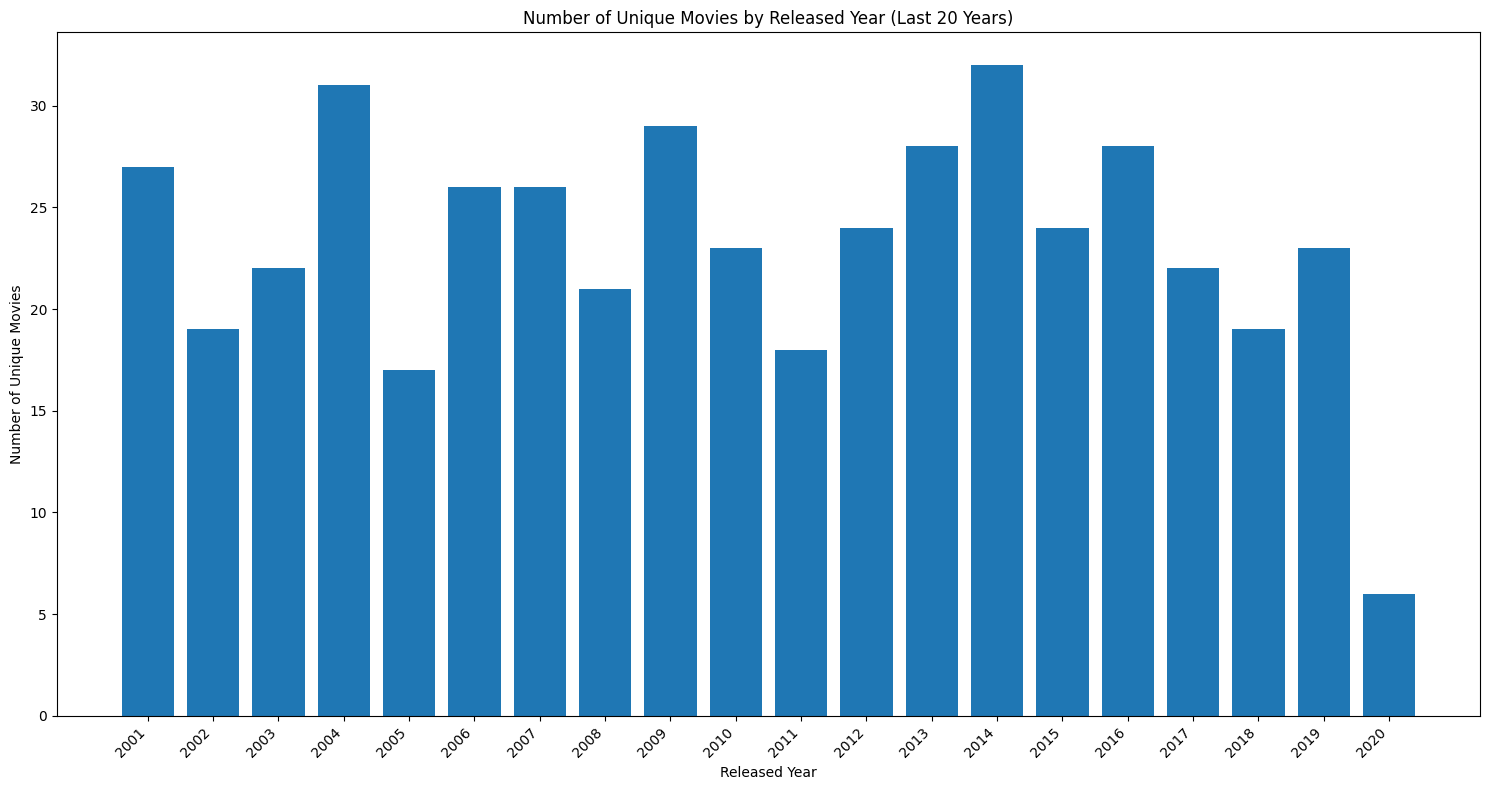

In [ ]:
# Convert 'Released_Year' to numeric, coercing errors to NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Drop rows where 'Released_Year' is NaN after coercion
df_cleaned_year = df.dropna(subset=['Released_Year']).copy()

# Convert 'Released_Year' to integer after dropping NaNs
df_cleaned_year['Released_Year'] = df_cleaned_year['Released_Year'].astype(int)

# Get the latest year in the data
latest_year = df_cleaned_year['Released_Year'].max()

# Filter data for the last 20 years
last_20_years_df = df_cleaned_year[df_cleaned_year['Released_Year'] >= latest_year - 19]

# ✅ Drop duplicate Series_Title to count only unique titles per year
last_20_years_unique = last_20_years_df.drop_duplicates(subset=['Series_Title'])

# Count the occurrences of each release year in the last 20 years (unique titles only)
year_counts_last_20 = last_20_years_unique['Released_Year'].value_counts().sort_index()

# Create a vertical bar chart for the last 20 years
plt.figure(figsize=(15, 8))
plt.bar(year_counts_last_20.index.astype(str), year_counts_last_20.values)
plt.xlabel('Released Year')
plt.ylabel('Number of Unique Movies')
plt.title('Number of Unique Movies by Released Year (Last 20 Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-185350108.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Released_Year'] = df['Released_Year'].astype(int)


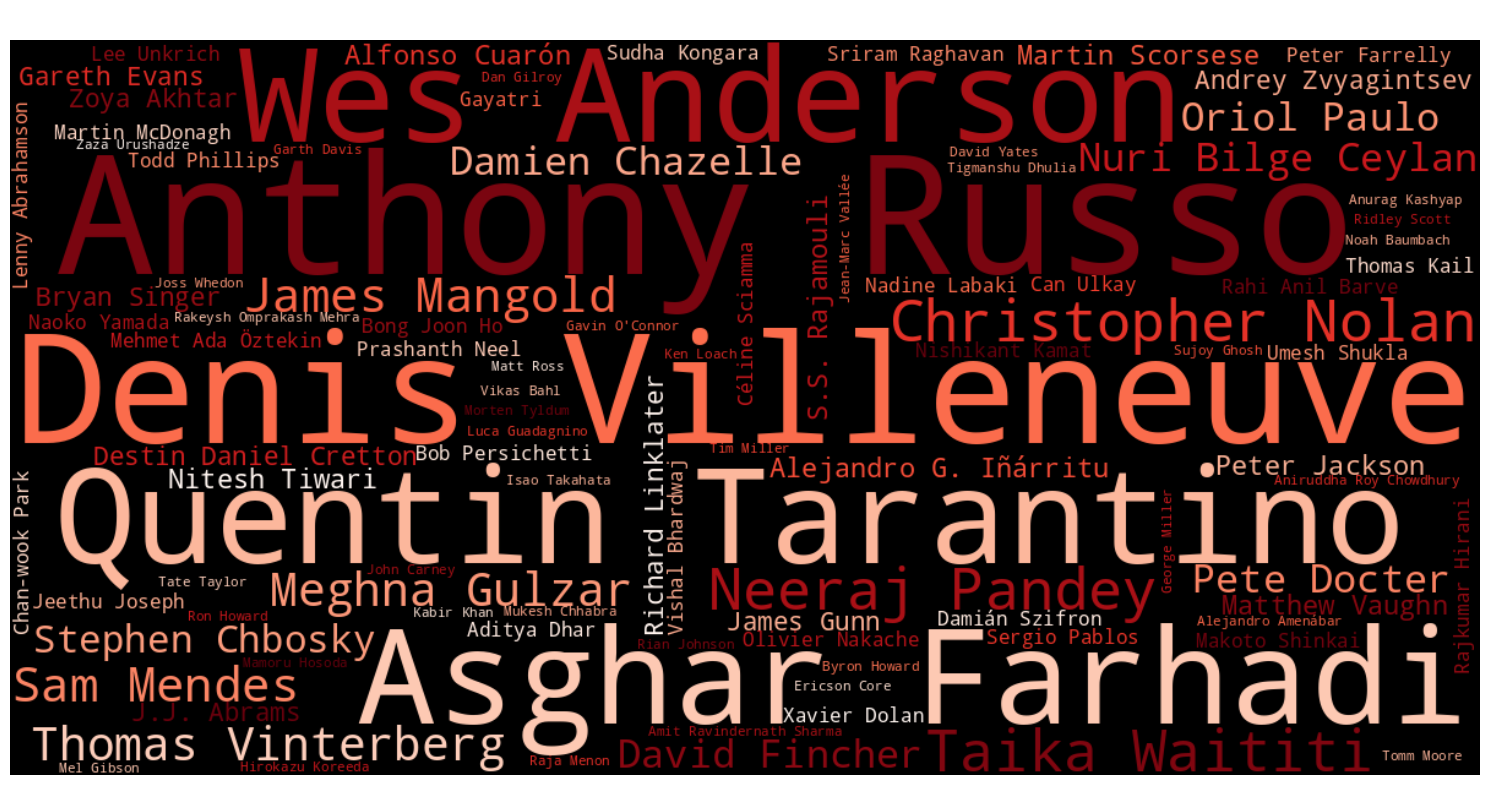

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# ----- เตรียมข้อมูล -----
# แปลงปีเป็นตัวเลขและลบค่าที่ไม่ใช่ตัวเลข
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df = df.dropna(subset=['Released_Year'])
df['Released_Year'] = df['Released_Year'].astype(int)

# หาปีล่าสุดในข้อมูล
latest_year = df['Released_Year'].max()

# กรองเฉพาะ 10 ปีล่าสุด
last_10_years = df[df['Released_Year'] >= latest_year - 9]

# ลบชื่อหนังซ้ำ (กันกรณีหนังเรื่องเดียวกันนับหลายครั้ง)
last_10_years = last_10_years.drop_duplicates(subset=['Series_Title', 'Director'])

# นับจำนวนครั้งที่ผู้กำกับแต่ละคนปรากฏ
director_counts = last_10_years['Director'].value_counts()

# ----- สร้าง Word Cloud -----
wordcloud = WordCloud(
    width=1200, height=600,
    background_color='black',   # พื้นหลังสีดำ
    colormap='Reds',            # โทนสีแดงเหมือนในภาพ
    max_words=100,              # จำกัดจำนวนคำสูงสุด
    collocations=False          # ปิดการจับคู่คำซ้ำ เช่น 'Jay Karas Jay Karas'
).generate_from_frequencies(director_counts)

# ----- แสดงผล -----
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Directors in Last 10 Years', fontsize=20, color='white')
plt.tight_layout()
plt.show()


# looker studio

https://lookerstudio.google.com/reporting/e90bfc15-e133-46b3-9104-5dbed7a2a584